# Исследование объявлений о продаже квартир

## Описание проекта

Определение рыночной стоимости объектов недвижимости на основе архива объявлений о продаже квартир в Санкт-Петербурге и соседних населенных пунктах за несколько лет.

Задача - установление параметров и создание на их основе автоматизированной системы, отфильтровывающей аномальные значения и мошенническую деятельность

Данные - пользовательские и автоматизированные, полученные на основе картографических данных.

# Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format ='{:,.2f}'.format
pd.options.mode.chained_assignment = None

In [2]:
# Открытие файла с данными
try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [3]:
# Получение общей информации о таблице и данных в ней
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных
- total_images — число фотографий квартиры в объявлении
- last_price — цена на момент снятия с публикации
- total_area — площадь квартиры в квадратных метрах (м²)
- first_day_exposition — дата публикации
- rooms — число комнат
- ceiling_height — высота потолков (м)
- floors_total — всего этажей в доме
- living_area — жилая площадь в квадратных метрах (м²)
- floor — этаж
- is_apartment — апартаменты (булев тип)
- studio — квартира-студия (булев тип)
- open_plan — свободная планировка (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- balcony — число балконов
- locality_name — название населённого пункта
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- cityCenters_nearest — расстояние до центра города (м)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)

# Шаг 2. Предобработка данных

1. Определите и изучите пропущенные значения:
- Для некоторых пропущенных значений можно предположить логичную замену. Например, если человек не указал число балконов — скорее всего, их нет. Такие пропуски правильно заменить на 0. Для других типов данных нет подходящего значения на замену. В этом случае правильно оставить эти значения пустыми. Отсутствие значения — тоже важный сигнал, который не нужно прятать.
- Заполните пропуски, где это уместно. Опишите, почему вы решили заполнить пропуски именно в этих столбцах и как выбрали значения.
- Укажите причины, которые могли привести к пропускам в данных.
2. Приведите данные к нужным типам:
- Поясните, в каких столбцах нужно изменить тип данных и почему.

In [4]:
# total_images
data.total_images.value_counts()

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
4      986
14     986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
32       4
28       4
50       3
29       3
27       2
30       2
35       2
31       2
42       1
25       1
39       1
37       1
Name: total_images, dtype: int64

в столбце total_images тип данных корректен. Пропусков нет. Значения кол-ва фотографий в пределах разумного.

In [5]:
# last_price
data.last_price.value_counts()

4,500,000.00     342
3,500,000.00     291
4,300,000.00     260
4,000,000.00     260
4,200,000.00     259
                ... 
12,890,000.00      1
29,375,000.00      1
7,545,600.00       1
5,205,000.00       1
11,475,000.00      1
Name: last_price, Length: 2978, dtype: int64

In [6]:
# судя по выводу данных, копеек в выводе нет. Изменим тип на int.
data.last_price = data.last_price.astype('int')
data.last_price.describe()

count        23,699.00
mean      6,541,548.77
std      10,887,013.27
min          12,190.00
25%       3,400,000.00
50%       4,650,000.00
75%       6,800,000.00
max     763,000,000.00
Name: last_price, dtype: float64

В столбце last_price тип данных изменен на int, пропусков нет. Имеются выбросы по минимальным и максимальным ценам. Держим в голове для дальнейшего анализа и необходимости убрать данные выбросы из датасета

In [7]:
# total_area
data.total_area.value_counts()

45.00     419
42.00     383
60.00     347
31.00     346
44.00     345
         ... 
184.40      1
55.64       1
56.16       1
109.10      1
76.75       1
Name: total_area, Length: 2182, dtype: int64

In [8]:
data.total_area.describe()

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

В столбце total_area тип данных float оставляем. пропусков нет. Имеются выбросы максимальных значений. Держим в голове для дальнейшего анализа и необходимости убрать данные выбросы из датасета.

In [9]:
# first_day_exposition
data.first_day_exposition.value_counts()

2018-02-01T00:00:00    368
2017-11-10T00:00:00    240
2017-10-13T00:00:00    124
2017-09-27T00:00:00    111
2018-03-26T00:00:00     97
                      ... 
2018-05-20T00:00:00      1
2015-05-15T00:00:00      1
2015-01-12T00:00:00      1
2015-12-19T00:00:00      1
2015-07-19T00:00:00      1
Name: first_day_exposition, Length: 1491, dtype: int64

In [10]:
# first_day_exposition необходимо привести к временному типу данных
# в данных не указаны часы-минуты-секунды, поэтому при выводе их можно опустить
data.first_day_exposition = pd.to_datetime(data.first_day_exposition, format='%Y-%m-%d')

In [11]:
data.sort_values(by='first_day_exposition').first_day_exposition

10132   2014-11-27
8393    2014-11-27
15857   2014-11-27
2831    2014-11-27
696     2014-11-27
           ...    
10917   2019-05-03
5986    2019-05-03
9217    2019-05-03
21887   2019-05-03
15072   2019-05-03
Name: first_day_exposition, Length: 23699, dtype: datetime64[ns]

В столбце first_day_exposition тип данных изменен на datetime, пропусков нет, данные предоставлены за период ноябрь 2014 по май 2015 года. Все прекрасно оставляем как есть

In [12]:
# rooms
data.rooms.value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

В столбце rooms тип данных нас устраивает. Пропусков нет. Имеются завышенные данные со значениями больше 7 комнат. В дальнейшем оценить их как прочее кол-во или выбросы с дальнейшем удалением. Также обратить внимание на 0 кол-во комнат. Будут ли эти данные влиять на общий датасет.

In [13]:
# ceiling_height
data.ceiling_height.value_counts()

2.50    3515
2.60    1646
2.70    1574
3.00    1112
2.80     993
        ... 
5.00       1
2.20       1
2.34       1
3.93       1
3.59       1
Name: ceiling_height, Length: 183, dtype: int64

In [14]:
data.ceiling_height.describe()

count   14,504.00
mean         2.77
std          1.26
min          1.00
25%          2.52
50%          2.65
75%          2.80
max        100.00
Name: ceiling_height, dtype: float64

In [15]:
# среднее и медиана высоты потолков примерно одинаковы. 
# И жизненный опыт подсказывает, что медианное значение высоты примерно и есть 2,65
# Все пропуски можно заполнить медианным значением без ущерба данным
data.ceiling_height = data.ceiling_height.fillna(data.ceiling_height.median())

В стоблце имется выбросы максимальных значений. В дальнейшем стоит оценить их влияние на общую таблицу и либо оставить, либо удалить из данных

In [16]:
# floors_total
data.floors_total.value_counts()

5.00     5788
9.00     3761
16.00    1376
12.00    1362
4.00     1200
10.00    1174
25.00    1075
6.00      914
17.00     833
3.00      668
7.00      592
14.00     553
18.00     505
24.00     469
8.00      390
2.00      383
15.00     365
23.00     352
19.00     339
22.00     286
20.00     271
13.00     229
11.00     203
27.00     164
21.00     158
26.00     124
1.00       25
35.00      24
28.00      21
36.00       3
34.00       1
60.00       1
29.00       1
33.00       1
52.00       1
37.00       1
Name: floors_total, dtype: int64

In [17]:
# кол-во пропусков небольшое. Можно заполнить медианными значениями и сменить тип данных на целочисленный
# data.floors_total = data.floors_total.fillna(data.floors_total.median()).astype('int')
#
# удаляем пропуски
print('Кол-во пропуско до удаления: ', data.floors_total.isna().sum())
data = data.dropna(subset=['floors_total'])
print('Кол-во пропуско после удаления: ', data.floors_total.isna().sum())
# меняем тип данных
data.floors_total = data.floors_total.astype('int')

Кол-во пропуско до удаления:  86
Кол-во пропуско после удаления:  0


В столбце floors_total для смены типа данных необходимо было заполнить пропуски. Так как их очень мало и врятли мы можем их каким-либо способом востановить, то просто их удалим. 

Пропуски удалены, тип данных поменян. Остальное в пределах допустимого, хотя есть небольшие выбросы, которые необходимо будет оценить в дальнейшем.

In [18]:
# living_area
data.living_area.value_counts()

18.00     882
17.00     674
30.00     598
16.00     484
20.00     481
         ... 
92.10       1
94.54       1
77.80       1
129.00      1
42.55       1
Name: living_area, Length: 1769, dtype: int64

In [19]:
data.living_area.describe()

count   21,743.00
mean        34.46
std         22.04
min          2.00
25%         18.60
50%         30.00
75%         42.30
max        409.70
Name: living_area, dtype: float64

In [20]:
# В данных имеются небольшое кол-во пропусков. Беглый анализ данных в столбце показывает небольшое различие между
# средним и медианой, что позволяет нам заполнить пропуски медианым значением.
#data.living_area = data.living_area.fillna(data.living_area.median())
#
# заполним пропуски медианой в зависимости от кол-ва комнат
print('Кол-во пропусков до: ', data.living_area.isna().sum())
for rooms in data.rooms.unique():
    rooms_median = data.loc[data.rooms == rooms, 'living_area'].median()
    print(rooms, rooms_median)
    data.loc[(data.living_area.isna()) & (data.rooms == rooms), 'living_area'] = rooms_median
print('Кол-во пропусков после: ', data.living_area.isna().sum())

Кол-во пропусков до:  1870
3 45.0
1 17.6
2 30.5
4 63.5
5 91.785
6 124.4
0 18.0
7 145.0
11 133.9
8 161.0
14 195.15
10 161.4
15 409.0
9 179.2
19 264.5
16 180.0
12 409.7
Кол-во пропусков после:  0


В столбце living area заполнили пропуски медианным значением в зависимости от кол-ва комнат. Имеются выбросы как при минимальных, так и максимальных значениях. Необходимо будет проанализировать для скорректированной таблицы

In [21]:
# floor
data.floor.value_counts()

2     3366
3     3069
1     2914
4     2794
5     2617
6     1296
7     1214
8     1075
9     1046
10     684
12     520
11     520
13     376
15     340
14     335
16     315
17     226
18     175
19     144
21     121
22     112
20     108
23      99
24      61
25      46
26      24
27      10
28       1
30       1
29       1
32       1
33       1
31       1
Name: floor, dtype: int64

В столбце floor пропусков нет. Данные находятся в пределах допустимого. Тип данных корректный. Оставляем все как есть

In [22]:
# is_apartment
data.is_apartment.value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [23]:
# огромное кол-во пропусков. Учитывая небольшую распространенность апартаментов, логично было бы заполнить все пропуски значениями False
data.is_apartment = data.is_apartment.fillna(False)
# заменяем тип данных на булев
data.is_apartment = data.is_apartment.astype(bool)

В столбце is_apartment заполнили пропуски и сменили тип данных на корректный

In [24]:
# studio
data.studio.value_counts()

False    23467
True       146
Name: studio, dtype: int64

В столбце studio тип данных корректен, пропусков нет

In [25]:
# open_plan
data.open_plan.value_counts()

False    23546
True        67
Name: open_plan, dtype: int64

В столбце open_plan тип данных корректен, пропусков нет

In [26]:
# kitchen_area
data.kitchen_area.value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1100
7.00     1062
         ... 
20.56       1
53.10       1
12.56       1
11.84       1
13.83       1
Name: kitchen_area, Length: 966, dtype: int64

In [27]:
data.kitchen_area.describe()

count   21,382.00
mean        10.56
std          5.90
min          1.30
25%          7.00
50%          9.10
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [28]:
data[data.rooms == 0]['kitchen_area'].isna().sum()

194

In [29]:
# малое кол-во пропусков и схожие значения среднего и медианы позволяют нам заполнить пропуски медианными значениями
# data.kitchen_area = data.kitchen_area.fillna(data.kitchen_area.median())
#
# заполняем пропуски медианым значения в зависимсоти от жилой площади
print('Кол-во пропусков до: ', data.kitchen_area.isna().sum())
for rooms in data.rooms.unique():
    rooms_median = data.loc[data.rooms == rooms, 'kitchen_area'].median()
    print(rooms, rooms_median)
    data.loc[(data.kitchen_area.isna()) & (data.rooms == rooms), 'kitchen_area'] = rooms_median
print('Кол-во пропусков после: ', data.kitchen_area.isna().sum())

Кол-во пропусков до:  2231
3 9.5
1 9.0
2 8.7
4 11.05
5 15.1
6 19.75
0 nan
7 20.0
11 12.600000000000001
8 25.0
14 21.25
10 19.8
15 100.0
9 14.3
19 27.6
16 13.0
12 112.0
Кол-во пропусков после:  194


/work/yandex/ds/venv_ya_ds/lib64/python3.10/site-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [30]:
data.kitchen_area = data.kitchen_area.fillna(0)

В столбце kitchen_area пропуски заполнены медианым значением в зависимости от кол-ва комнат, тип данных корректный. 

В квартирах с кол-вом комнат 0, площадь кухни неуказана. Заполнили пропуски нулями.

Имеются выбросы максимальных и минимальных значений, которые требуют дальнейшего анализа

In [31]:
# balcony
data.balcony.value_counts()

1.00    4195
0.00    3713
2.00    3657
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

In [32]:
# заполняем пропуски нулями и меняем тип данных
data.balcony = data.balcony.fillna(0).astype('int')

В столбце balcony пропуски скорее всего отображают их отсутствие. Заполняем их нулями и меняем тип данных на целочисленный

In [33]:
# locality_name
data.locality_name.value_counts()

Санкт-Петербург                    15651
посёлок Мурино                       520
посёлок Шушары                       439
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [34]:
# пропуски данных мы врятли сможем заполнить, для дальнейшего анализа данный столбец нам понадобится
# поэтому пропуски данных удалим
data = data.dropna(subset=['locality_name'])

In [35]:
data[~(data.airports_nearest.isna() & data.cityCenters_nearest.isna() & data.parks_around3000.isna() & data.parks_nearest.isna() & data.ponds_around3000.isna() & data.ponds_nearest.isna())]['first_day_exposition'].value_counts()

2018-02-01    290
2017-11-10    196
2017-10-13     89
2017-09-27     86
2018-07-10     70
             ... 
2016-01-16      1
2015-06-22      1
2015-07-26      1
2017-01-03      1
2015-07-19      1
Name: first_day_exposition, Length: 1466, dtype: int64

В столбцах airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest мы врятли сможем заполнить пропуски. Оставляем как есть. Данные скорее всего автоматически подгружены системой, необходимо уточнить с чем может быть связано отсутствие необходимых данных в датасете. Сказать, что датасет заполнялся до того, как ввели автоматический, расчет мы не можем. Публикации есть во всех годах. Просто удалить или заполнить какими-либо значениями не можем, а значит и сменить тип данных в некоторых столбцах например parks_around3000 на целочисленный тоже не можем. Оставляем данные столбцы как есть.

In [36]:
# days_exposition
data.days_exposition.value_counts()

45.00       879
60.00       538
7.00        234
30.00       208
90.00       200
           ... 
964.00        1
1,147.00      1
1,228.00      1
1,112.00      1
971.00        1
Name: days_exposition, Length: 1139, dtype: int64

In [37]:
data.days_exposition.describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

In [38]:
# заменяем пропуски нулями и меняем тип данных
data.days_exposition = data.days_exposition.fillna(0).astype('int')

В столбце days_exposition отсутствие значений небольшое и возможно связанное с тем, что объявления менялись сразу после их обявления. Также меняем тип значений на целочисленный. Также в данных присутствуют характерные выбросы по длительности. Необходимо проанализировать целесообразность оставления данных значений в конечной таблице

In [39]:
# на всякий случай проверяем полные дубликаты записей
data.duplicated().sum()

0

Вывод: в представленных данных имеются сведения о продаже квартир с конца 2014 года по середину 2019 года. Общая площадь квартир варьируется от 12 - 900 кв.м. Среднее - 60,3, медиана - 52 кв.м. Средняя цена квартир по датасету составляет 6,5 млн.р., медианное значение около 4,6 млн.р. Большая часть выборки ожидаемо составляют 1,2 и 3-хкомнатные квартиры, со средней высотой потолков 2,77 м. Чаще всего публикации о продаже квартир находятся на сайте примерно 3 месяца, самая долгая запись больше 4ех лет. Возможно про нее забыли...

# Шаг 3. Посчитайте и добавьте в таблицу

1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [40]:
# цена кв.м.
data['price_meter'] = data.last_price / data.total_area
data.price_meter = data.price_meter.astype('int')
# проверяем
data.price_meter.head()

0    120370
1     82920
2     92785
3    408176
4    100000
Name: price_meter, dtype: int64

In [41]:
# день недели, месяц и год публикации объявления
data['day_exp'] = data.first_day_exposition.dt.weekday
data['month_exp'] = data.first_day_exposition.dt.month
data['year_exp'] = data.first_day_exposition.dt.year

In [42]:
# этаж квартиры; варианты — первый, последний, другой
# ф-ция для категоризации
def floor_cat(row):
    floor_total = row.floors_total
    floor = row.floor
    if floor == 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'
# заполняем доп. столбец
data['floor_cat'] = data.apply(floor_cat, axis=1)

In [43]:
# соотношение жилой и общей площади, а также отношение площади кухни к общей
data['living_area_ratio'] = data.living_area / data.total_area
data['kitchen_area_ratio'] = data.kitchen_area / data.total_area

# Шаг 4. Проведите исследовательский анализ данных и выполните инструкции

- Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.
- Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?
- Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.
- Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.
- Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.
- Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.
- Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [44]:
# изучаем площадь
data.total_area.describe()

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

<AxesSubplot:>

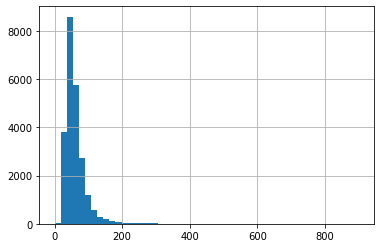

In [45]:
data.total_area.hist(bins=50, grid=True, range=(0, 900))

<AxesSubplot:>

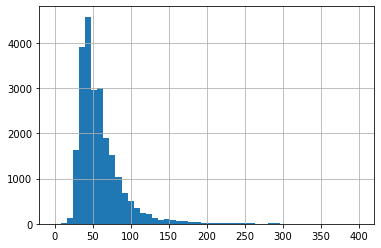

In [46]:
data.total_area.hist(bins=50, grid=True, range=(0, 400))

<AxesSubplot:>

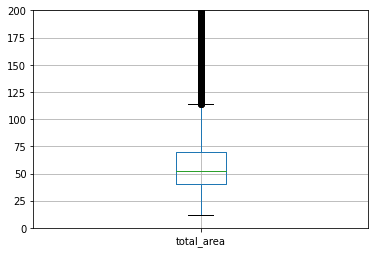

In [47]:
plt.ylim(0, 200)
data.boxplot(column='total_area')

Согласно графикам выше допустимо исключить значения общей площади свыше 250 кв.м.

In [48]:
# изучаем цену
data.last_price.describe()

count        23,565.00
mean      6,540,058.26
std      10,910,934.72
min          12,190.00
25%       3,400,000.00
50%       4,646,000.00
75%       6,790,000.00
max     763,000,000.00
Name: last_price, dtype: float64

<AxesSubplot:>

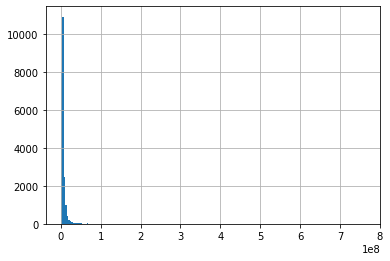

In [49]:
data.last_price.hist(bins=200, grid=True)

<AxesSubplot:>

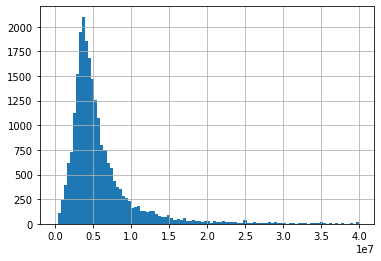

In [50]:
data.last_price.hist(bins=100, grid=True, range=(0, 40000000))

<AxesSubplot:>

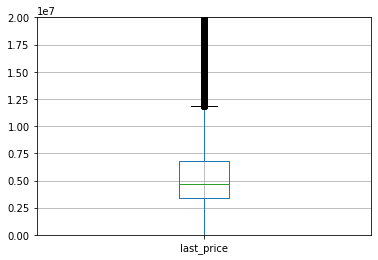

In [51]:
plt.ylim(0, 20000000)
data.boxplot(column='last_price')

По данным диаграммы размаха нормальные значения лежат в диапозоне от 0 до 12,5 млн.р. Исходя их данных гистограммы значения конечной цены квартир можно ограничить 30 млн.р. Квартир дороже 30млн.р. очень мало и они лишь увеличивают кол-во выбросов.

In [52]:
# изучаем число комнат
data.rooms.describe()

count   23,565.00
mean         2.07
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

<AxesSubplot:>

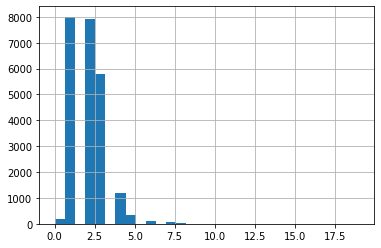

In [53]:
data.rooms.hist(bins=30, grid=True)

<AxesSubplot:>

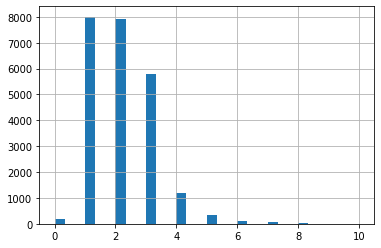

In [54]:
data.rooms.hist(bins=30, grid=True, range=(0, 10))

<AxesSubplot:>

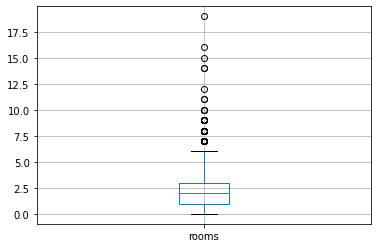

In [55]:
data.boxplot(column='rooms')

Судя по рафикам выше, квартиры с кол-вом комнат свыше 6 можно исключить из выборки как очень редкие выбросы

In [56]:
# изучаем высоту потолков
data.ceiling_height.describe()

count   23,565.00
mean         2.72
std          0.99
min          1.00
25%          2.60
50%          2.65
75%          2.70
max        100.00
Name: ceiling_height, dtype: float64

<AxesSubplot:>

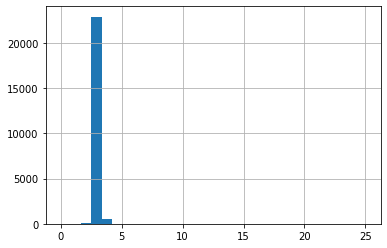

In [57]:
data.ceiling_height.hist(bins=30, range=(0, 25), grid=True)

<AxesSubplot:>

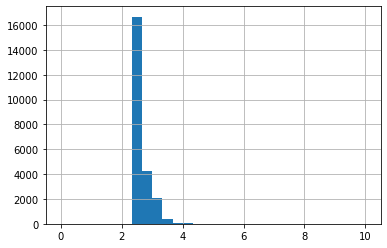

In [58]:
data.ceiling_height.hist(bins=30, range=(0, 10), grid=True)

<AxesSubplot:>

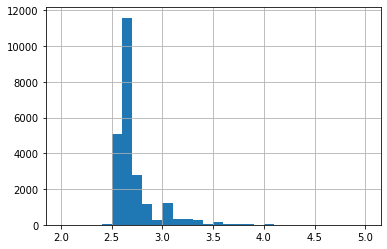

In [59]:
data.ceiling_height.hist(bins=30, range=(2, 5), grid=True)

<AxesSubplot:>

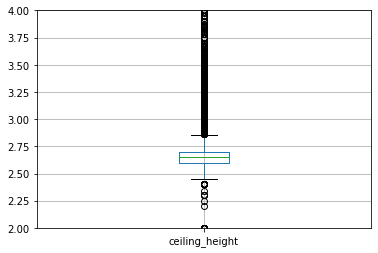

In [60]:
plt.ylim(2, 4)
data.boxplot(column='ceiling_height')

Высоту потолков имеет смысл ограничить от 2 до 4 метров. Подавляющая часть значений составляет 2,6-2,7м.

### Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [61]:
# изучаем время продажи квартиры
data.loc[data.days_exposition != 0].days_exposition.describe()

count   20,394.00
mean       180.74
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

<AxesSubplot:>

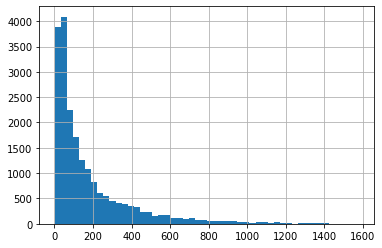

In [62]:
data.loc[data.days_exposition != 0].days_exposition.hist(bins=50, grid=True)

Исходя из гистограммы и метода .describe мы видим, что присутствуют слишком быстрые продажи, составляющие несколько дней и слишком долгие, более 1200 дней (более 3ех лет). Слишком быстрые продажи мы можем смело исключить по причине того, что продажа квартиры в течении нескольких дней крайне маловероятна. Скорее всего это либо технические ошибки, либо продавец перевыставлял недвижимость по каким-то своим причинам. Слишком долгие продажи составляют примерно от 1200 дней. Кол-во квартир в этот промежуток времени уже стремится к нулю и отсекая более долгие продажи мы лишь сократим кол-во выбросов

(1.0, 1000.0)

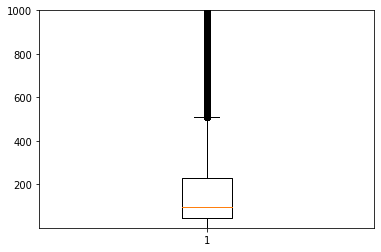

In [63]:
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.ylim(1,1000)

In [64]:
data[(data['days_exposition'] != 0) & (data['days_exposition'] <= 1200)]['days_exposition'].describe()

count   20,304.00
mean       175.65
std        206.33
min          1.00
25%         45.00
50%         94.50
75%        228.00
max      1,200.00
Name: days_exposition, dtype: float64

Среднее время продажи согласно графикам и расчетам выше составляет от 1 до 500 дней

<AxesSubplot:ylabel='Frequency'>

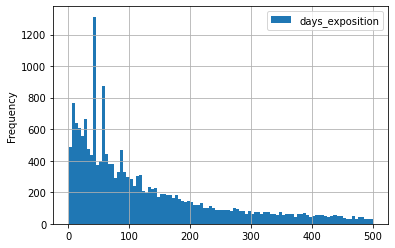

In [65]:
# более подробно изучим всплеск данных 0-500
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,500))

<AxesSubplot:ylabel='Frequency'>

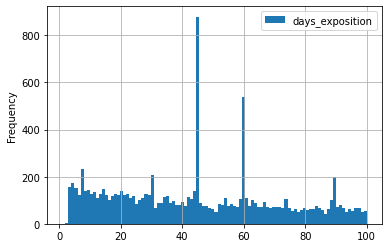

In [66]:
# более подробно изучим всплеск данных 0-100
data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,100))

In [67]:
data[(data['days_exposition'] != 0) & (data['days_exposition'] <= 100)]['days_exposition'].value_counts().sort_values(ascending=False).head(10)

45    879
60    538
7     234
30    208
90    200
4     174
3     157
5     152
14    147
9     142
Name: days_exposition, dtype: int64

Обнаружены подозрительные всплески снятий объявлений в подозрительно круглые даты (кратные месецам), такие как 45, 60, 7, 30 и 90 дней. Скорее всего данные всплески связаны с политикой размещения объявлений на сервисе. Данную информацию необходимо уточнить у сотрудников сервиса.

### Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

<AxesSubplot:>

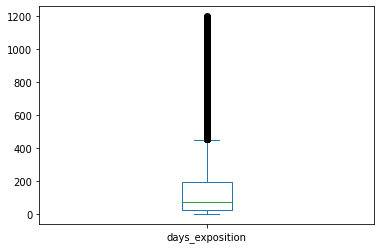

In [68]:
# отфильтровываем значения, согласно нашим предположениями выше.
good_data = (data
             .query(
                 '''last_price <= 30_000_000 and \
                 total_area <= 250 and \
                 rooms <= 6 and \
                 2 <= ceiling_height <= 4 and \
                 days_exposition <= 1200 ''')
)
# выводим диаграмму размаха и гистограмму для обновленных данных
good_data.days_exposition.plot.box()

In [69]:
good_data.days_exposition.describe()

count   23,026.00
mean       151.07
std        199.87
min          0.00
25%         22.00
50%         72.00
75%        194.00
max      1,200.00
Name: days_exposition, dtype: float64

<AxesSubplot:>

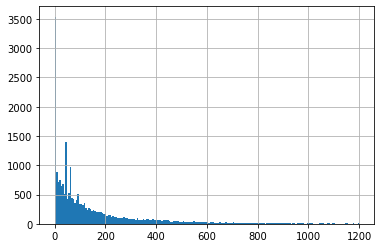

In [70]:
good_data.days_exposition.hist(bins=200, grid=True)

<AxesSubplot:>

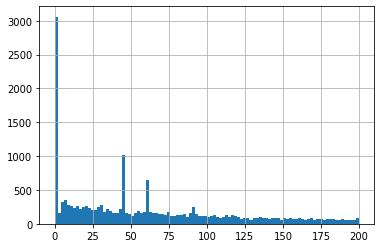

In [71]:
good_data.days_exposition.hist(bins=100, grid=True, range=(0, 200))

In [72]:
good_data.days_exposition.value_counts().sort_values(ascending=False).head(10)

0     3058
45     878
60     537
7      232
30     205
90     182
4      173
3      155
5      146
14     143
Name: days_exposition, dtype: int64

Вывод: в обновленной таблице после удаления аномалий получили большие значения среднего и медианы (180.7/151.0 и 95/72), нормальные значения времени продажи составляют от 1 до 500

### Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [73]:
good_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_meter', 'day_exp',
       'month_exp', 'year_exp', 'floor_cat', 'living_area_ratio',
       'kitchen_area_ratio'],
      dtype='object')

In [74]:
# цена и общая площадь
good_data.last_price.corr(data.total_area)

0.7864164022586594

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

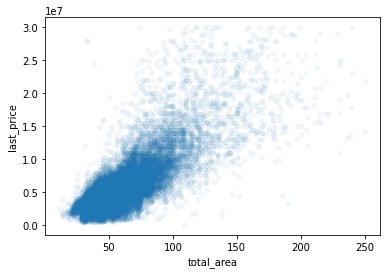

In [75]:
(good_data
 .sort_values('total_area')
 .plot(x='total_area', 
       y='last_price', 
       kind='scatter', 
       alpha=0.05))

Вывод: цена квартиры зависит от общей площади, коэф. Пирсона 0.79. На графике видно, что при увеличении нормальных значений площади квартиры, ее цена растет, данная зависимость почти не видна при значениях площади больше ~120кв.м.

<AxesSubplot:xlabel='rooms'>

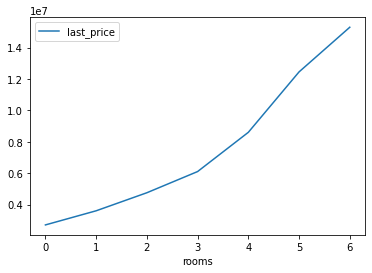

In [76]:
# цена и кол-во комнат
# создадим сводную таблицу сгруппировав значения по кол-ву комнат и медианной цене к каждому значению
good_data.pivot_table(index='rooms', values='last_price', aggfunc=['median']).plot(y='median')

Вывод: цена квартиры растет с кол-вом комнат, что в свою очередь совпадает с ростом цены от общей площади. Больше комнат, больше площадь, больше цена.

In [77]:
# цена и удаленность от центра
good_data.last_price.corr(data.cityCenters_nearest)

-0.34138388078446835

<AxesSubplot:xlabel='cityCenters_nearest', ylabel='last_price'>

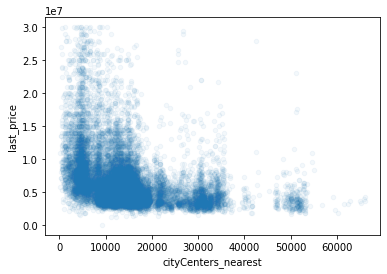

In [78]:
good_data.plot(kind='scatter', x='cityCenters_nearest', y='last_price', alpha=0.05)

На гистограмме заметно присутствие более дорогих квартир ближе к центру. Чем дальше расстояние тем кол-во дорогих квартир становится все меньше. Но на гистограмме также видно большое количество недорогих квартир недалеко от центра

<AxesSubplot:xlabel='floor_cat'>

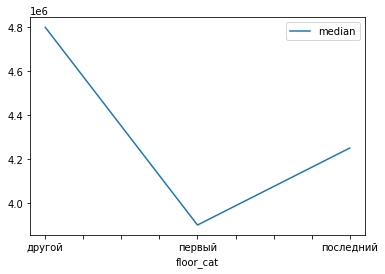

In [79]:
# изучаем зависимость цены квартиры от этажа
price_floor_cat_pivot = good_data.pivot_table(index='floor_cat', values='last_price', aggfunc=['median'])
price_floor_cat_pivot.columns = ['median']
price_floor_cat_pivot.plot(y='median')

Исходя из данных полученных на графике выше, самые дорогие квартиры в середине домов, чуть дешевле (примерно на 13%) на последнем этаже и еще дешевле на первом (примерно 30% от середины дома)

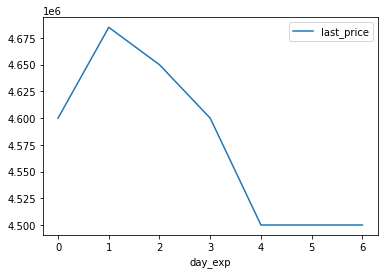

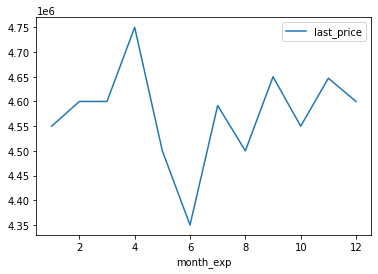

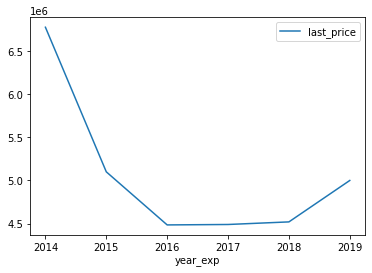

In [80]:
# изучаем зависимость стоимости квартиры от даты размещения
# создаем список с необходимыми названиями столбцов
list_of_date_exp = ['day_exp', 'month_exp', 'year_exp']
# создаем цикл для построения гистограмм по каждому столбцу
for item in list_of_date_exp:
    good_data.pivot_table(index=item, values='last_price', aggfunc='median').plot()

Выводы: 

1. Пик продаж приходится на вторник. Возможно это связано с тем, что люди в общей массе на выходных готовятся к продаже, определяют основные параматры, делают фото и определяются с ценой, которая изначально завышена. В понедельник готовят объявление, во вторник выкладывают. Падение ближе к выходным возможно связано с обновлением заявки и снижением цены. 
2. На втором графике (зависимость от месяца) видены пик в апреле и провал в июне. Мне кажется это характерная сезонность. Летом провал, потому что все в отпусках, поэтому есть пик в апреле (успеть продать до лета) и подъем в августе (начало продаж после возвращения из отпусков). На графике легко заметить странную особенность: после июньского провала цен появляются локальные пики по нечетным месяцам и локальные минимумы на четных, с чем это может быть связано даже придумать не могу. 
3. На третьем графике (зависимость от лет) прослеживавется падение цен с 2014-2016 годы. Мне кажется после падения рубля в 14ом люди активно вкладывали в недвижимость, затем у основной массы свободные деньги для инвестиций в жилье закончились и наметился серьезный спад. С 16-18ый практически не было дорогих предложений. После 18ого ситуация видимо стала изменяться в сторону повышения цен.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [81]:
good_data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'price_meter', 'day_exp',
       'month_exp', 'year_exp', 'floor_cat', 'living_area_ratio',
       'kitchen_area_ratio'],
      dtype='object')

In [82]:
local_pivot = good_data.pivot_table(index='locality_name', values='price_meter', aggfunc=['count', 'mean'])
local_pivot.columns = ['count', 'mean']

In [83]:
# 10 населенных пунктов с наибольшим кол-вом объявлений и средней ценой кв.м
top_local = local_pivot.sort_values(by='count', ascending = False).head(10)
top_local

,count,mean
locality_name,,
Санкт-Петербург,15156,"110,508.69"
посёлок Мурино,518,"85,645.45"
посёлок Шушары,439,"78,550.88"
Всеволожск,396,"68,621.10"
Пушкин,363,"103,086.32"
Колпино,337,"75,332.87"
посёлок Парголово,325,"90,259.32"
Гатчина,306,"68,757.23"
деревня Кудрово,299,"92,473.09"


In [84]:
# 10 населенных пунктов с наибольшей средней стоимостью кв.м.
top_local.sort_values(by='mean', ascending = False)

,count,mean
locality_name,,
Санкт-Петербург,15156,"110,508.69"
Пушкин,363,"103,086.32"
деревня Кудрово,299,"92,473.09"
посёлок Парголово,325,"90,259.32"
посёлок Мурино,518,"85,645.45"
посёлок Шушары,439,"78,550.88"
Колпино,337,"75,332.87"
Гатчина,306,"68,757.23"
Всеволожск,396,"68,621.10"


Больше всего объявлений в Санкт-Петербурге, самое маленькое кол-во объявлений в топ-10 в Выборге. Средняя стоимость кв.м. самая высокая в Санкт-Петербурге, самая низкая в топ-10 также в Выборге

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

In [85]:
good_data.cityCenters_nearest.describe()

count   17,560.00
mean    14,403.10
std      8,577.90
min        208.00
25%      9,649.75
50%     13,229.00
75%     16,398.25
max     65,968.00
Name: cityCenters_nearest, dtype: float64

In [86]:
# создаем столбец с км
good_data['cityCenters_nearest_km'] = good_data.cityCenters_nearest / 1000

In [87]:
# заполним пробелы данных рандом числом для дальнейшей отфильтровки и приведем все к типу int
good_data['cityCenters_nearest_km'] = good_data.cityCenters_nearest_km.fillna(100).astype('int')

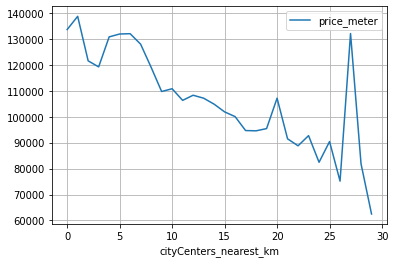

In [88]:
# создаем сводную таблицу для дальнейшего анализа
cityCenters_pivot = (good_data
                     .query('''locality_name == "Санкт-Петербург" and \
                               cityCenters_nearest_km != 100''')
                     .pivot_table(index='cityCenters_nearest_km', 
                                  values='price_meter')
                     .plot(grid=True))

По графику сложно сказать где именно считать данную границу. Искомым радиусом признаем 7км. Начиная с данного расстояния наблюдается характерное снижение цены за кв.м. Также есть пик на растоянии примерно 26-27км. Его можно смело игнорировать так как это точно не центр и скорее всего выброс в каком населенном пункте

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [89]:
# выделяем сегмент квартир в центре. Радиус будет 3 км
center_data = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km <= 7')

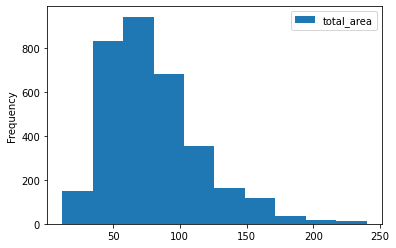

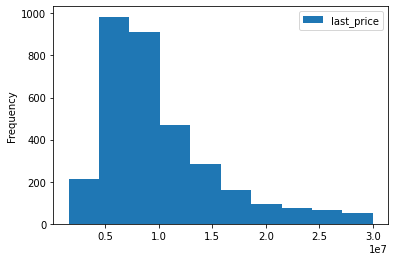

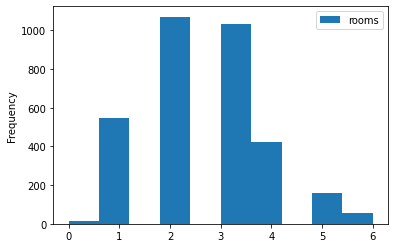

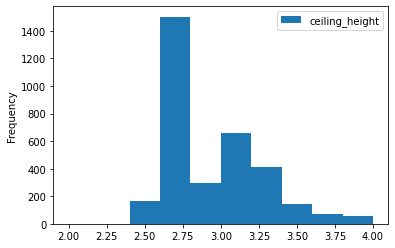

In [90]:
# создаем цикл для анализа данных по площади, цене, числу комнат и высоте потолков в центре города
list_of_center = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for item in list_of_center:
    center_data.plot(kind='hist', y=item)

Выводы:
1. Общая площадь квартир в центре в среднем немного больше чем в общей выборке
2. Цена продажи квартир в центре почти вдвое выше чем в целом по выборке
3. Среднее кол-во комнат примерно схоже в центре и в данных общей выборки
4. Высота потолков как и ожидалось одинаковая

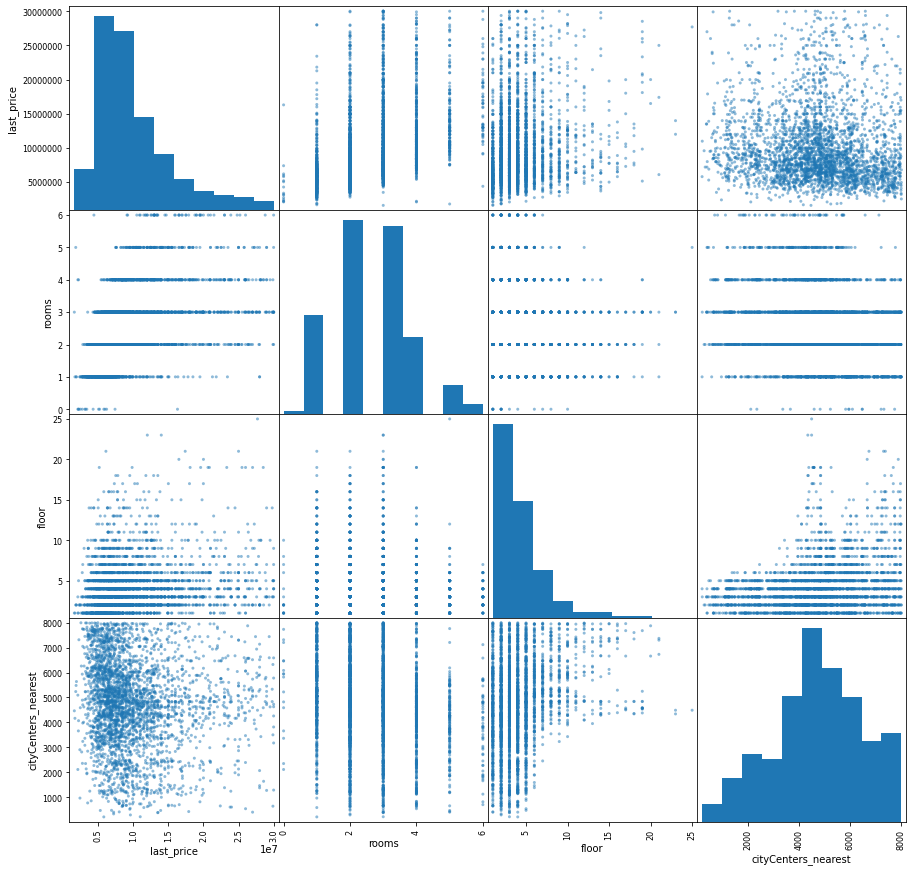

In [91]:
# формируем таблицу для анализа
scatter_center_data = center_data[['last_price', 'rooms', 'floor', 'cityCenters_nearest']]
pd.plotting.scatter_matrix(scatter_center_data, figsize=(15,15));
#good_data.columns

In [92]:
scatter_center_data.corr()

,last_price,rooms,floor,cityCenters_nearest
last_price,1.00,0.44,0.17,-0.10
rooms,0.44,1.00,-0.08,-0.21
floor,0.17,-0.08,1.00,0.26
cityCenters_nearest,-0.10,-0.21,0.26,1.00


Из матрицы корреляции и матрицы диаграмм рассеяния можно выделить, что наибольшая зависимость существует между ценой квартиры и кол-вом комнат. Слабая обратная зависимость цены от дальности от центра. Остальные данные почти не зависят друг от друга

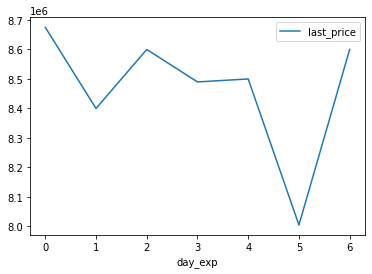

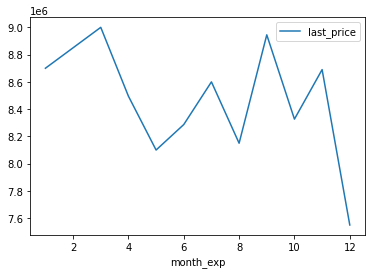

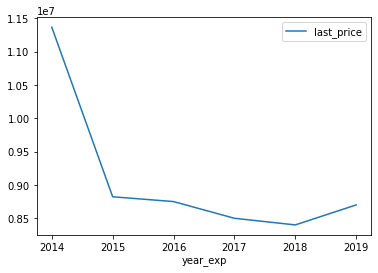

In [93]:
# анализируем зависимость цены квартиры в центре от даты размещения
# создаем цикл для построения гистограмм по каждому столбцу
for item in list_of_date_exp:
    center_data.pivot_table(index=item, values='last_price', aggfunc='median').plot()

Вывод: 
1. в отличии от данных в целом по выборке в центре пик самых дорогих объявлений приходится с воскресения на понедельник.
2. по месяцам в феврале более сильно выраженный пик и нет сильного провала продаж летом, но также присутствует характерный пик в конце лета.
3. по годам снижение цены в центре было более резким до 2015ого. Затем, как и целом по выборке плато до 2018ого и небольшое увеличение цены в 2019ом

# Шаг 5. Общий вывод

Входе анализа данных, была проведена предобработка данных, в ходе которой были исключены из анализа выбросы:
1. слишком быстрые продажи (несколько дней)
2. слишком медленные продажи (дольше 1200 дней)
3. слишком дорогие квартиры, стоимостью в несколько сотен миллионов
4. квартиры с огромным кол-вом комнат, не характерным для подавляющего числа квартир. 

Нормальное значение времени продажи составило от 1 до 500 дней

Также были обнаружены странные аномалии в характерных, кратных месяцам, датах с момента публикации. Данная информация требует консультаций с сотрудниками, предоставившими данные, так как данные выбросы очень похожи на на внутренние требования площадки по длительности выкладывания публикации о продаже.

Были заполненны доп. столбцы:
1. цена квадратного метра
2. день, месяц, год продажи
3. этажность квартир
4. соотношение жилой площаи к общей
5. соотношение площади кухни к общей

Был проведен анализ скорректированной таблицы для поиска взаимосвязей между характерными признаками. 
- Цена квартиры прямо зависит от кол-ва комнат и прямо зависит от общей площади квартиры. Но было уточненно, что однозначная связь между ценой квартиры и ее площадью теряется после 120 кв.м. 
- Был проведен анализ зависимости стоимости квартиры от центра города и стоимость очевидным образом падала, хотя стоит отметить достаточное кол-во недорогих квартир, находящихся не так далеко от центра. Чем дальше тем кол-во дорогих квартир ожидаемо стремится к нулю. 
- Проанализирована цена квартир в зависимости от этажа в здании, очевидным образом самые дешевые квартиры на первом этаже, самые дорогие в середине. 
- Больше всего объявлений и самая дорогая цена кв.м. в Санкт-Петербурге. 
- При исследовании зависимости цены квартиры от даты объявления было выясненно, что самые дорогие объявления в основной массе выкладываются во вторник, существуют характерные пики продаж дорогих квартир в марте, августе, что в свою очередь подтверждает сезонность на данном рынке. 
- При анализе публикаций по годам было выявлено колосальное снижение начиная с 2014 по 2018 год. Потом цены на квартиры стали опять расти.

В рамках исследования было предложено определить центр Санкт-Петербурга исходя их стоимости квартир и расстояния от центра города. В рамках данной выборки провести аналогичное выше исследование и сравнить результаты. В итоге предполагаемым центром был принят радиус в 7 км. 

В сравнении с общей выборке:
- квартиры в центре Санкт-Петербурга больше, в среднем в два раза дороже, 
- среднее кол-во комнат и высота потолков оказалось аналогичной. 
- Зависимость цен от удаленности от центра для выборки в 7 км оказалось слабее. 
При исследовании остальных параметров оказалось:
- в центре самые дорогие объявления появляются в среду, а не во вторник, 
- менее выражена сезонность, в июне продаже не сильно уступают продажам в течении года, хотя в конце лета как и в общей выборке присутствует характерный пик
- в отличии от общей выборке в центре цена квартир снижалась более резко и быстро и на плато вышла уже в 2015ом. Как и в общей выборке с 2018ого намечается увеличение цен